In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler #Standardization
from sklearn.model_selection import train_test_split #splitting dataset
from sklearn import linear_model
from sklearn.linear_model import LinearRegression #Linear Regression Model

In [19]:
from sklearn.datasets import load_boston

In [20]:
boston = load_boston()

In [21]:
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [22]:
df_x = pd.DataFrame(boston.data,columns = boston.feature_names)

In [27]:
df_y = pd.DataFrame(boston.target)

In [24]:
df_x

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [25]:
df_y

,0
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [28]:
df_x.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [34]:
df_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


C:\Users\chavsan01\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\chavsan01\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\chavsan01\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `di

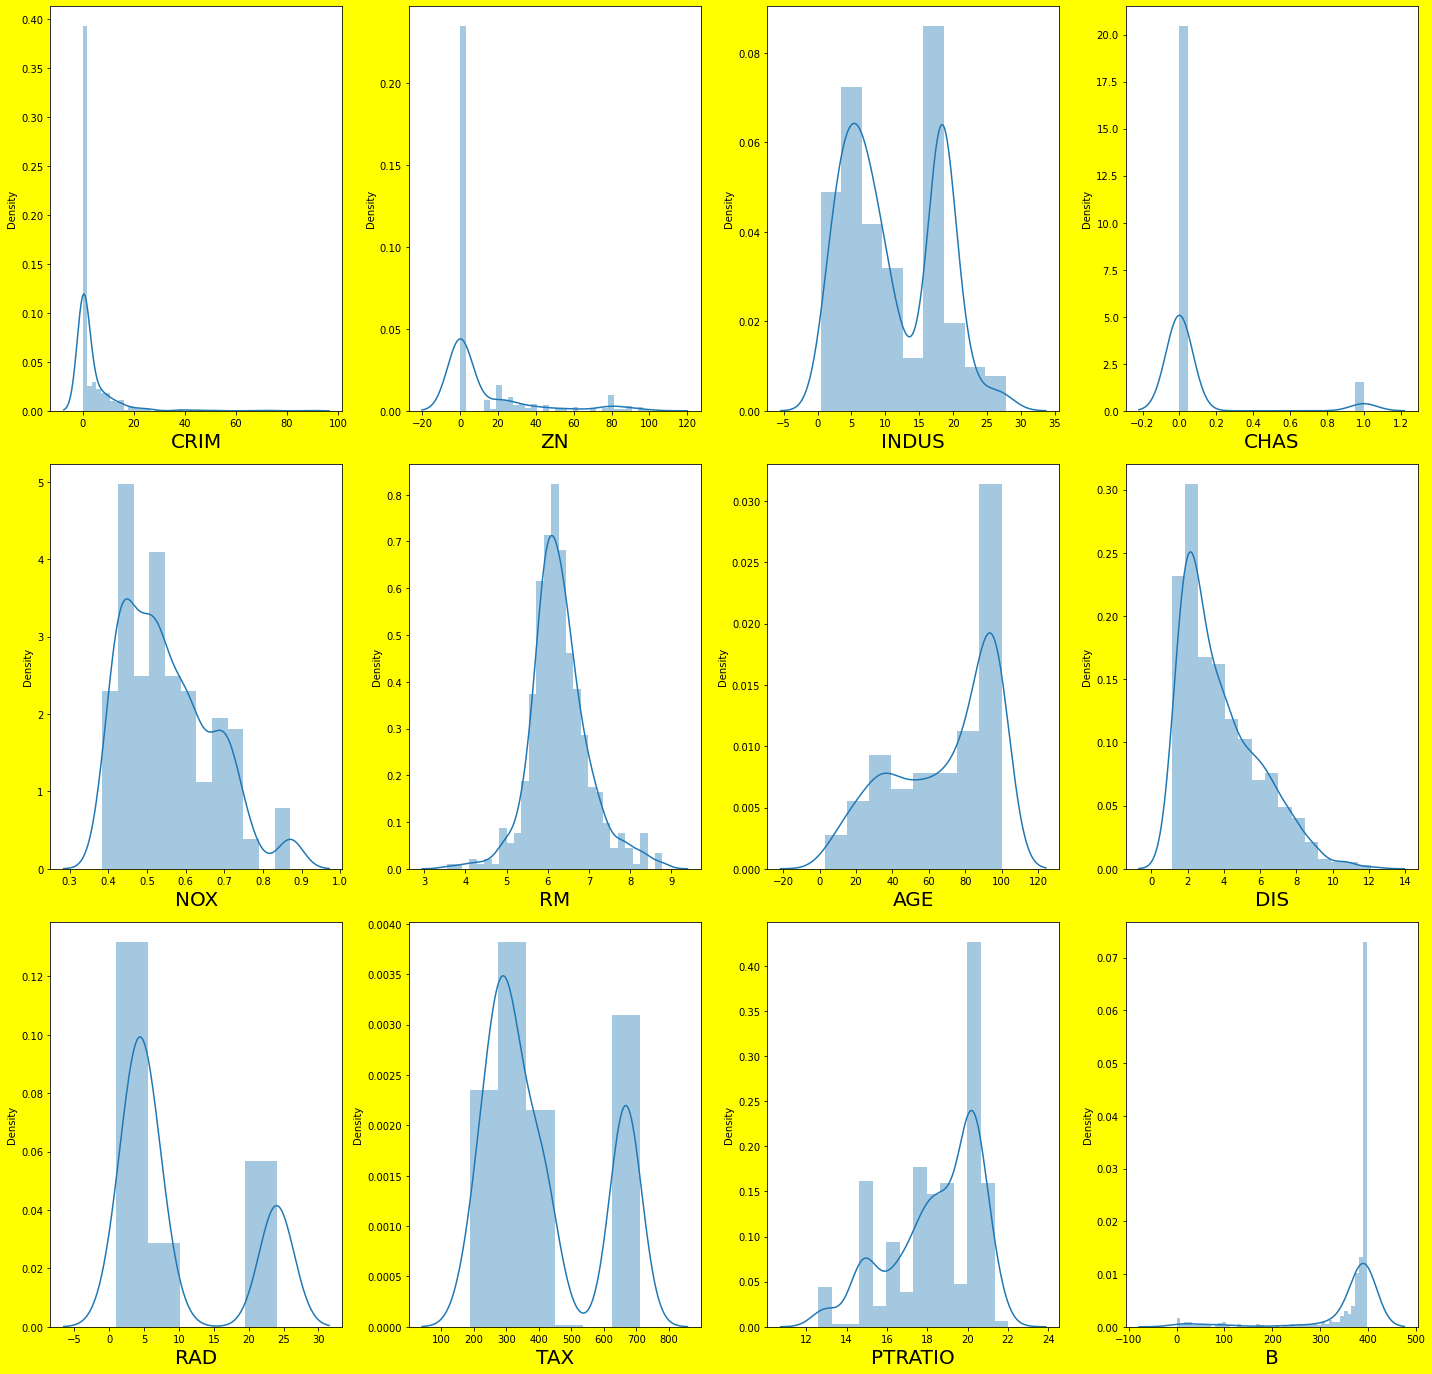

In [36]:
#Lets see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='yellow')
plotnumber = 1

for column in df_x:
    if plotnumber<=12:
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(df_x[column]) #plotting
        plt.xlabel(column,fontsize=20) #Label
        
    plotnumber +=1
plt.tight_layout()

In [51]:
scaler = StandardScaler()

In [54]:
df_x_scaled = scaler.fit_transform(df_x)

In [55]:
df_x_scaled

array([[-0.41978194,  0.28482986, -1.2879095 , ..., -1.45900038,
         0.44105193, -1.0755623 ],
       [-0.41733926, -0.48772236, -0.59338101, ..., -0.30309415,
         0.44105193, -0.49243937],
       [-0.41734159, -0.48772236, -0.59338101, ..., -0.30309415,
         0.39642699, -1.2087274 ],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.98304761],
       [-0.40776407, -0.48772236,  0.11573841, ...,  1.17646583,
         0.4032249 , -0.86530163],
       [-0.41500016, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.66905833]])

In [56]:
#splitting of data into training & testing
x_train,x_test,y_train,y_test = train_test_split(df_x_scaled,df_y,test_size=0.2,random_state=4)

In [57]:
model = LinearRegression()

In [58]:
model.fit(x_train,y_train)#training of model

LinearRegression()

In [59]:
model.score(x_train,y_train) #training accuracy

0.7415244219726307

In [60]:
model.score(x_test,y_test) #Testing Accuracy

0.7263451459702509

In [61]:
from sklearn.metrics import r2_score

In [62]:
predy = model.predict(x_test)

In [63]:
predy # Predicted by model

array([[12.07495986],
       [26.9894969 ],
       [17.58803353],
       [18.15584511],
       [36.92091659],
       [25.43267386],
       [31.09256932],
       [19.72549907],
       [19.66103377],
       [22.96358632],
       [28.38841214],
       [28.48925986],
       [18.99690357],
       [32.41097504],
       [21.52350275],
       [15.25945122],
       [21.23364112],
       [11.6220597 ],
       [11.37109662],
       [13.63515584],
       [ 5.62431971],
       [17.35323315],
       [20.80951594],
       [22.51311312],
       [16.39055556],
       [20.32352451],
       [17.88994185],
       [14.23445109],
       [21.1187098 ],
       [17.50765806],
       [14.54295525],
       [23.63289896],
       [34.32419647],
       [22.23027161],
       [16.82396516],
       [20.16274383],
       [30.67665825],
       [35.61882904],
       [23.50372003],
       [24.66451121],
       [36.91269871],
       [32.33290254],
       [19.11785719],
       [32.19546605],
       [33.42795148],
       [25

In [64]:
y_test

,0
8,16.5
289,24.8
68,17.4
211,19.3
226,37.6
...,...
368,50.0
144,11.8
336,19.5
437,8.7


In [65]:
r2 = r2_score(y_test,predy)

In [66]:
r2

0.7263451459702509

In [67]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,predy) #MSE

25.419587126821853

In [68]:
adjr2 = 1-(1-r2)*(len(y_test)/(len(y_test)-13-1)) #adjusted r2

In [69]:
adjr2

0.682809146465518